In [215]:
import numpy as np
import pandas as pd
import random 

In [216]:
#import pygad
import matplotlib.pyplot as plt

# Inicijalizacija podataka(tačaka):

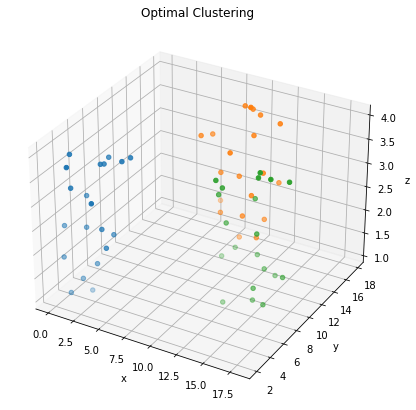

In [217]:
cluster1_num_samples = 20
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x3_start = 1
cluster1_x3_end = 4
cluster1_x1 = np.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = np.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start
cluster1_x3 = np.random.random(size=(cluster1_num_samples))
cluster1_x3 = cluster1_x3 * (cluster1_x3_end - cluster1_x3_start) + cluster1_x3_start

cluster2_num_samples = 20
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x3_start = 1
cluster2_x3_end = 4
cluster2_x1 = np.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = np.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start
cluster2_x3 = np.random.random(size=(cluster2_num_samples))
cluster2_x3 = cluster2_x3 * (cluster2_x3_end - cluster2_x3_start) + cluster2_x3_start

cluster3_num_samples = 20
cluster3_x1_start = 12
cluster3_x1_end = 18
cluster3_x2_start = 6
cluster3_x2_end = 9
cluster3_x3_start = 1
cluster3_x3_end = 4
cluster3_x1 = np.random.random(size=(cluster3_num_samples))
cluster3_x1 = cluster3_x1 * (cluster3_x1_end - cluster3_x1_start) + cluster3_x1_start
cluster3_x2 = np.random.random(size=(cluster3_num_samples))
cluster3_x2 = cluster3_x2 * (cluster3_x2_end - cluster3_x2_start) + cluster3_x2_start
cluster3_x3 = np.random.random(size=(cluster3_num_samples))
cluster3_x3 = cluster3_x3 * (cluster3_x3_end - cluster3_x3_start) + cluster3_x3_start

c1 = np.array([cluster1_x1, cluster1_x2, cluster1_x3]).T
c2 = np.array([cluster2_x1, cluster2_x2, cluster2_x3]).T
c3 = np.array([cluster3_x1, cluster3_x2, cluster3_x3]).T

# c1 = np.array([cluster1_x1, cluster1_x2]).T
# c2 = np.array([cluster2_x1, cluster2_x2]).T
# c3 = np.array([cluster3_x1, cluster3_x2]).T


data = np.concatenate((c1, c2, c3), axis=0)

#fig,ax=plt.subplots(figsize=(16,7))

#dodato
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#dodato_kraj 
ax.scatter(cluster1_x1, cluster1_x2, cluster1_x3)
ax.scatter(cluster2_x1, cluster2_x2, cluster2_x3)
ax.scatter(cluster3_x1, cluster3_x2, cluster3_x3)

# plt.scatter(cluster1_x1, cluster1_x2)
# plt.scatter(cluster2_x1, cluster2_x2)
# plt.scatter(cluster3_x1, cluster3_x2)

plt.title("Optimal Clustering")
plt.show()

In [218]:
points0=data.tolist()
# za cuvanje random tacaka

# with open(r'savedInput1.txt', 'w') as fp:
#     for item in points0:
#         # write each item on a new line
#         fp.write("%s\n" % item)
#     print('Done')

points0

[[3.8052396677840425, 2.111785585890563, 3.2485203488898384],
 [4.584192210552374, 2.852337956611663, 2.2895755786779985],
 [1.5122952208393736, 2.1234592048073897, 1.2436357846377546],
 [0.7772826903138047, 3.483238881647494, 3.8977259854817268],
 [2.126892999332193, 2.963643943541412, 1.475568078671547],
 [4.950825256649178, 5.833883048086841, 3.79913480174634],
 [2.788941349631359, 5.891787785004045, 3.676353243035793],
 [1.3630970012556491, 2.724818179817027, 3.338390177649706],
 [2.1825910130075417, 4.077560433118113, 1.0765522436682433],
 [0.060262070420341596, 3.4291596512098224, 2.396461414865901],
 [1.7387061919987907, 4.117657966981424, 2.3822491021911336],
 [1.365186291534442, 2.280857717826338, 3.808915847678199],
 [1.5061214451820888, 4.552810285133336, 2.972125670211058],
 [4.219230815958697, 4.385656086137554, 2.351239278708234],
 [3.150807441900433, 3.5383254608911705, 1.7806834948917798],
 [4.647314744283157, 5.095322733889983, 3.791398833312507],
 [2.914711834776012, 

# Ucitavanje podataka - bird.csv dataset:


In [219]:
df=pd.read_csv('bird.csv')
X=df.dropna()
y=X['type']
X=X.drop(['id','type'],axis=1)
klase=y.unique().tolist()
X

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13
...,...,...,...,...,...,...,...,...,...,...
415,17.96,1.63,19.25,1.33,18.36,1.54,31.25,1.33,21.99,1.15
416,19.21,1.64,20.76,1.49,19.24,1.45,33.21,1.28,23.60,1.15
417,18.79,1.63,19.83,1.53,20.96,1.43,34.45,1.41,22.86,1.21
418,20.38,1.78,22.53,1.50,21.35,1.48,36.09,1.53,25.98,1.24


In [220]:
from sklearn.metrics import silhouette_score

In [221]:
from sklearn.metrics import davies_bouldin_score

In [222]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [223]:
scaler = StandardScaler()

In [224]:
X_scaled=scaler.fit_transform(X)
points0=X_scaled.tolist()
points0

[[0.2945908101280861,
  0.8043282942444386,
  0.04778595674363682,
  0.5821550057449225,
  0.25094298012797545,
  0.2368987482825869,
  -1.5584667658007063,
  0.40722318678084946,
  -0.026234421001767337,
  0.4083367122410619],
 [0.44517259152245725,
  0.7868335036145103,
  0.19254087509008994,
  0.906726843472769,
  0.5140843235428798,
  0.5341166604107067,
  0.4113779909726422,
  0.6378151047089123,
  0.09422412355429276,
  0.48588843418015776],
 [0.27958819722163575,
  0.6958605923388831,
  0.001063418544957689,
  0.7650123791127235,
  0.3143384089430384,
  0.3359713856586268,
  0.28299008993562114,
  0.4120271850710173,
  -0.04301257542207575,
  0.1802434124201916],
 [0.23661775037846966,
  0.4614303978978435,
  -0.05840163007154303,
  0.5318692280687771,
  0.16188749679252956,
  0.14773337464415082,
  0.12006663441020252,
  0.10457129450026643,
  -0.15185547461023022,
  0.21217647439511356],
 [-0.03843015290645221,
  0.16051999906307615,
  -0.2906551199537044,
  0.0564400573124950

# Reprezentacija jedinke:

In [225]:
class Individual:
    def __init__(self,points,num_clusters):
        #inicijalizujemo jedinke kao listu slucajnoodabranih tacaka duzine broja klastera:
        self.code=[points[random.randrange(len(points))] for _ in range(num_clusters)] 
        self.fitness = self.calcFitness(points,num_clusters)
        
#         self.fitness = self.calcFitnessSilueta(points)
#         self.fitness = self.calcFitnessDB(points)

#         self.centroids=self.calculateCentroids(points)
        
    def __lt__(self, other):
        return self.fitness < other.fitness
    
    
    def ed(self,a,b):
        a=np.array(a)
        b=np.array(b)
        dist=np.linalg.norm(a-b)
        
        return dist
    #odredjuje kom klasteru pripada tacka point:
    def cluster_id(self,point,centers):
        d=float('inf')
        index=-1
        best_d=float('inf')
        
        for i,c in enumerate(centers):
            new_d=self.ed(point,c)
            if new_d<best_d:
                best_d=new_d
                index=i
   
        return index
        
    def sse_partial(self,points,cluster_index):
        #s=0
        sc=0
        
        for p in points:
            if self.cluster_id(p,self.code)==cluster_index:
                sc+=(self.ed(p,self.code[cluster_index]))**2
                #if p[-1]==cluster_index:
            
        return sc
    
    #SSE(Sum squared error)-metrika koju koristimo za racunanje fitness-a
    def sse(self,points,num_clusters):
        s=0
        for k in range(num_clusters):
            s+=self.sse_partial(points,k)
        
        return s
   

    def calcFitness(self,points,num_clusters):
        
        error=self.sse(points,num_clusters)
        fitness=1/error
        
        return fitness
    
    def calcFitnessSilueta(self, points):
        ga_labels = []
        for p in points:
            ga_labels.append(self.cluster_id(p, self.code))
        return silhouette_score(points, ga_labels)
    
    def calcFitnessDB(self, points):
        ga_labels2 = []
        for p in points:
            ga_labels2.append(self.cluster_id(p, self.code))
        db = davies_bouldin_score(points, ga_labels2)
        return 1/db


In [226]:
def readFile(filename):
    with open(filename, 'r') as f:
        num_points,dim=[int(x) for x in f.readline().split()]
        points=[[float(x) for x in f.readline().split()] for _ in range(num_points)]
        return points

In [227]:
#points=readFile("input_test.txt")
#points=readFile("input2.txt")
# points=readFile("input3.txt")

In [228]:
import copy

points = copy.deepcopy(points0)
points1 = copy.deepcopy(points0)
# points1 = copy.deepcopy(points)

In [229]:
num_points=len(points)
num_dimensions=len(points[0])
print(num_points,num_dimensions)

413 10


In [230]:
#Eucledian distance-Euklidsko rastojanje
def ed(a,b):
    a=np.array(a)
    b=np.array(b)
    dist=np.linalg.norm(a-b)
    return dist

In [231]:
print(ed(points[1],points[2]))

0.5927202349855841


In [232]:
def cluster_id(point,centers):
    d=float('inf')
    index=-1
    best_d=float('inf')
    for i,c in enumerate(centers):
        new_d=ed(point,c)
        if new_d<best_d:
            best_d=new_d
            index=i
            
    return index

In [233]:
def same(arr1, arr2):
    if np.array_equal(arr1, arr2):
        return
    else:
        return False

In [234]:
def crossover(parent1,parent2,child1,child2):
    
    flag = True
    while(flag):
        breakpoint = random.randrange(len(parent1.code))

        child1.code[:breakpoint] = parent1.code[:breakpoint]
        child2.code[:breakpoint] = parent2.code[:breakpoint]

        child1.code[breakpoint:] = parent2.code[breakpoint:]
        child2.code[breakpoint:] = parent1.code[breakpoint:]
        
        f1 = True
        for i in range(len(child1.code) - 1):
            for j in range(i+1, len(child1.code)):
                if same(child1.code[i], child1.code[j]) or same(child2.code[i], child2.code[j]):
                    f1 = False
                    break
            if f1 == False:
                break
        if f1 == True:
            flag = False
    
    #print(breakpoint)

In [235]:
def selection(population):
    
    TOURNAMENT_SIZE = 5
    bestFitness = float('-inf')
    index = -1
    for i in range(TOURNAMENT_SIZE):
        randomIndividual = random.randrange(len(population))
        if population[randomIndividual].fitness > bestFitness:
            bestFitness = population[randomIndividual].fitness
            index = randomIndividual
    return index
    
    #biramo random predstavnika za svaki klaster
    #koji ce se vremenom unaprediti i tako ce napredovati ceo proces

In [236]:
def mutation(individual):
    #alfa=random vrednost kojom ce se za neki vektor pomeriti trenutni centar klastera
    #c_a =random int koji uz alfa utice na pomeraj centra
    #kao parametar/verovatnocu mutacije uzimamo 5% (MUTATION_RATE=0.05)
    MUTATION_PROB=0.05
    
    for i in range(len(individual.code)):
        l=np.array(individual.code[i])
        alpha=random.uniform(0,1)/2.0 ########DODATO!!!!
        c_a=random.randint(0,1)
        znak=random.uniform(0,1)
        if random.random()<MUTATION_PROB:
            if znak>=0.5:
                #l=l+(alpha*c_a)
                l=l+alpha  
                l=np.round(l,2)
                individual.code[i]=l.tolist()
            else:
                l=l-alpha
                #l=l - (alpha*c_a)
                l=np.round(l,2)
                individual.code[i]=l.tolist()
    

In [237]:
# points=data.tolist()

# Parametri genetskog algoritma:


In [238]:
POPULATION_SIZE = 100 # VRATI NA 300
NUM_GENERATIONS = 50 # VRATI NA 100
ELITISIM_SIZE = POPULATION_SIZE // 5
num_clusters=3

In [239]:

population = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]
newPopulation = [Individual(points,num_clusters) for _ in range(POPULATION_SIZE)]

for i in range(NUM_GENERATIONS):
    population.sort(reverse=True)
    newPopulation[:ELITISIM_SIZE] = population[:ELITISIM_SIZE]
    
    for j in range(ELITISIM_SIZE, POPULATION_SIZE, 2):
        
        parent1Index = selection(population)
        parent2Index = selection(population)
        
        crossover(population[parent1Index], population[parent2Index], newPopulation[j], newPopulation[j+1])
        
        
        mutation(newPopulation[j])
        mutation(newPopulation[j+1])
        
        newPopulation[j].fitness = newPopulation[j].calcFitness(points,num_clusters)
        newPopulation[j+1].fitness = newPopulation[j+1].calcFitness(points,num_clusters)

#         newPopulation[j].fitness = newPopulation[j].calcFitnessSilueta(points)
#         newPopulation[j+1].fitness = newPopulation[j+1].calcFitnessSilueta(points)

#         newPopulation[j].fitness = newPopulation[j].calcFitnessDB(points)
#         newPopulation[j+1].fitness = newPopulation[j+1].calcFitnessDB(points)
                
    population = newPopulation

    
bestIndividual = max(population)
print(f'solution: {bestIndividual.code}, fitness: {bestIndividual.fitness}')

solution: [[-0.65, -0.55, -0.53, -0.6, -0.62, -0.63, -0.74, -0.77, -0.69, -0.79], [0.4, 0.67, 0.1, 0.53, 0.39, 0.22, 0.3, 0.31, 0.04, 0.44], [1.47, 2.09, 1.25, 1.56, 1.7, 2.07, 1.44, 1.96, 1.67, 1.53]], fitness: 0.0008331600197610813


In [240]:
cluster_centers=copy.deepcopy(bestIndividual.code)
cluster_centers=np.round(cluster_centers,6)
print(cluster_centers)

[[-0.65 -0.55 -0.53 -0.6  -0.62 -0.63 -0.74 -0.77 -0.69 -0.79]
 [ 0.4   0.67  0.1   0.53  0.39  0.22  0.3   0.31  0.04  0.44]
 [ 1.47  2.09  1.25  1.56  1.7   2.07  1.44  1.96  1.67  1.53]]


In [241]:
#Svakoj tacki skupa Points dodajemo kao poslednji element redni broj klastera kome bi trebalo da odgovaraju
def assign_center(points,centers):
    best_d=float("inf")
    ind=-1
    n=len(points[0])
    
    for p in points:
        best_d=float('inf')
        for j,c in enumerate(centers):
            if(len(p)==n and len(c)==n):
                d_new=ed(p,c)
            
                if d_new<best_d:
                    ind=j
                    best_d=d_new    
                    
        p.append(ind)
        

In [242]:
# print(points[0],points[-1])
lab = []
for i in range(len(points)):
    lab.append(points[i][-1])

lab = np.array(lab)

lab

array([ 4.08336712e-01,  4.85888434e-01,  1.80243412e-01,  2.12176474e-01,
        8.44442265e-02, -5.24117534e-02,  3.17099392e-01,  3.94651114e-01,
        6.50115610e-01,  1.54880321e+00,  1.68109733e+00,  7.50476662e-01,
        1.16560647e+00,  5.90811352e-01,  1.89367144e-01,  2.62357000e-01,
        2.66918866e-01,  1.52872216e-01,  5.25111645e-02,  1.84805278e-01,
       -1.16277877e-01,  5.95373218e-01,  4.08336712e-01, -4.44732229e-01,
       -3.03314383e-01, -5.24117534e-02,  3.55146238e+00,  3.32793095e+00,
        2.96754354e+00,  4.96107898e+00,  5.08424936e+00,  3.21661258e-01,
        1.62635493e+00,  1.92287622e+00,  1.53055575e+00,  1.68565919e+00,
        1.58073627e+00,  1.94568555e+00,  2.72120277e+00,  3.24125550e+00,
        8.55399580e-01,  9.69446230e-01,  1.71303039e+00,  1.80882957e+00,
        9.83131828e-01,  9.05580106e-01,  1.40282350e+00,  2.66646038e+00,
        2.41099588e+00,  2.29238737e+00,  2.49310947e+00,  2.05060847e+00,
        2.24676871e+00, -

In [243]:
assign_center(points,cluster_centers)
# points

In [244]:
print(points[0],points[-1])

[0.2945908101280861, 0.8043282942444386, 0.04778595674363682, 0.5821550057449225, 0.25094298012797545, 0.2368987482825869, -1.5584667658007063, 0.40722318678084946, -0.026234421001767337, 0.4083367122410619, 1] [-0.8702416907196395, -1.0291257637720501, -0.8484372759764811, -1.1458471725807955, -0.9661486254564493, -0.9321583727546852, -0.9175817813633387, -0.9330923361760176, -0.7580200791798333, -0.8644239007593942, 0]


In [245]:
##########################################################

In [246]:
from operator import itemgetter
from itertools import groupby

In [247]:
#pravimo matricu u kojoj svaki red predstavlja listu tacaka za svaki klaster redom
def create_cluster_arrays(points,centers):
    points=sorted(points, key=lambda x: x[-1])
    M=[list(j) for i, j in groupby(points,key=itemgetter(num_dimensions))]
    return M

In [248]:
M=create_cluster_arrays(points,cluster_centers)
M

[[[-0.7824486226004121,
   -0.665234118669541,
   -0.7128569651308597,
   -0.7207037795006587,
   -0.7940753186727069,
   -0.5953114056761492,
   -0.7098411940590831,
   -0.6544604353462746,
   -0.7485554792504285,
   -0.5587788789994281,
   0],
  [-0.7550364409935646,
   -0.7177184905593259,
   -0.6990950538796123,
   -0.784703860179389,
   -0.7417489329840834,
   -0.5804505100697432,
   -0.6455154284471053,
   -0.7217164114086264,
   -0.6702574252889894,
   -0.5359695490173411,
   0],
  [-0.6648355461115734,
   -0.5742612073939135,
   -0.5577381383112449,
   -0.601846486811588,
   -0.42326237393698085,
   -0.3624907078424551,
   -0.36184934730576124,
   -0.4767124986100593,
   -0.31146304614701004,
   -0.4173610331104886,
   0],
  [-0.763186008498303,
   -0.8611757737247382,
   -0.8231221552797423,
   -0.8167039005187541,
   -1.039606820750094,
   -0.7637348892154172,
   -0.5076368406804483,
   -0.7697563943103062,
   -0.33039224600581957,
   -0.5085983530388366,
   0],
  [-0.6439059

In [249]:
###############################################################


# K-Means algoritam za skup points:

In [250]:
#######################################################################
X = pd.DataFrame(points1)
X[1][0]

0.8043282942444386

In [251]:
from sklearn.cluster import KMeans

In [252]:
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')

In [253]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [254]:
kmeans.cluster_centers_

array([[-0.64523216, -0.67300453, -0.6167766 , -0.6910983 , -0.6740801 ,
        -0.68171047, -0.67338947, -0.69673978, -0.60153385, -0.62341519],
       [ 0.34475718,  0.3417429 ,  0.27288539,  0.43413121,  0.41731544,
         0.33212311,  0.48517483,  0.43819111,  0.46600655,  0.27114142],
       [ 1.75955755,  1.87070748,  1.79436496,  1.75596445,  1.72487433,
         1.92275773,  1.58765267,  1.76927483,  1.35356602,  1.82296388]])

In [255]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [256]:
silhouette_score(X, kmeans.labels_)

0.49986437254440064

In [257]:
# uporedjeni centri dva algoritma
#dodata promenljiva ispod
print("Centri genetskog algoritma: ")
print(cluster_centers)
print()
print("Centri algoritma k sredina: ")
print(kmeans.cluster_centers_)

Centri genetskog algoritma: 
[[-0.65 -0.55 -0.53 -0.6  -0.62 -0.63 -0.74 -0.77 -0.69 -0.79]
 [ 0.4   0.67  0.1   0.53  0.39  0.22  0.3   0.31  0.04  0.44]
 [ 1.47  2.09  1.25  1.56  1.7   2.07  1.44  1.96  1.67  1.53]]

Centri algoritma k sredina: 
[[-0.64523216 -0.67300453 -0.6167766  -0.6910983  -0.6740801  -0.68171047
  -0.67338947 -0.69673978 -0.60153385 -0.62341519]
 [ 0.34475718  0.3417429   0.27288539  0.43413121  0.41731544  0.33212311
   0.48517483  0.43819111  0.46600655  0.27114142]
 [ 1.75955755  1.87070748  1.79436496  1.75596445  1.72487433  1.92275773
   1.58765267  1.76927483  1.35356602  1.82296388]]


In [258]:
k_means_centers=[]
for i in kmeans.cluster_centers_:
    k_means_centers.append(list(i))
    
k_means_centers

[[-0.645232163986096,
  -0.6730045321701064,
  -0.6167765978343928,
  -0.6910983000030149,
  -0.6740800955475966,
  -0.6817104654138256,
  -0.6733894703764745,
  -0.6967397796056317,
  -0.6015338515001338,
  -0.623415188117498],
 [0.3447571842514505,
  0.34174289638168903,
  0.27288538705788606,
  0.4341312063947069,
  0.4173154386298439,
  0.3321231096613757,
  0.48517483445737664,
  0.4381911096430892,
  0.4660065506084116,
  0.2711414200016989],
 [1.7595575505961096,
  1.8707074831001689,
  1.7943649551760723,
  1.755964447982572,
  1.7248743278243244,
  1.9227577252715957,
  1.5876526670102122,
  1.7692748331489678,
  1.353566017588739,
  1.8229638792612535]]

In [259]:
k_individual=Individual(points1,num_clusters)

In [260]:
k_individual.code=k_means_centers
k_means_fitness=k_individual.calcFitness(points1,num_clusters)
print("K_means_fitness:")
print(k_means_fitness)

K_means_fitness:
0.0009142575553373124


# PCA:

In [261]:
points_pca=copy.deepcopy(points1)
points_pca

[[0.2945908101280861,
  0.8043282942444386,
  0.04778595674363682,
  0.5821550057449225,
  0.25094298012797545,
  0.2368987482825869,
  -1.5584667658007063,
  0.40722318678084946,
  -0.026234421001767337,
  0.4083367122410619],
 [0.44517259152245725,
  0.7868335036145103,
  0.19254087509008994,
  0.906726843472769,
  0.5140843235428798,
  0.5341166604107067,
  0.4113779909726422,
  0.6378151047089123,
  0.09422412355429276,
  0.48588843418015776],
 [0.27958819722163575,
  0.6958605923388831,
  0.001063418544957689,
  0.7650123791127235,
  0.3143384089430384,
  0.3359713856586268,
  0.28299008993562114,
  0.4120271850710173,
  -0.04301257542207575,
  0.1802434124201916],
 [0.23661775037846966,
  0.4614303978978435,
  -0.05840163007154303,
  0.5318692280687771,
  0.16188749679252956,
  0.14773337464415082,
  0.12006663441020252,
  0.10457129450026643,
  -0.15185547461023022,
  0.21217647439511356],
 [-0.03843015290645221,
  0.16051999906307615,
  -0.2906551199537044,
  0.0564400573124950

In [262]:
for i in range(num_clusters):
    points_pca.append(cluster_centers[i])

In [263]:
points_tmp=copy.deepcopy(points_pca)
len(points_pca)

416

In [264]:
num_dimensions_pca=3

In [265]:
from sklearn.decomposition import PCA

In [266]:
pca=PCA(n_components=num_dimensions_pca)

In [267]:
pca.fit(points_pca)

PCA(n_components=3)

In [268]:
points_pca=pca.transform(points_pca)

In [269]:
pca_names=[f'pca_{i}' for i in range(num_dimensions_pca)]
pca_names

['pca_0', 'pca_1', 'pca_2']

In [270]:
pca.components_

array([[ 0.31646983,  0.32969119,  0.30758157,  0.31959533,  0.31995407,
         0.33319395,  0.31478815,  0.33132785,  0.2814303 ,  0.30486293],
       [-0.22825374, -0.26390423, -0.30849228, -0.30330235,  0.1930909 ,
         0.00427073,  0.39031011,  0.12946362,  0.66321824, -0.21173427],
       [-0.47586524,  0.04277222, -0.48018125,  0.04428238,  0.32244032,
         0.21893285, -0.15633329,  0.06299646, -0.18336203,  0.57031414]])

In [271]:
points_pca

array([[ 0.46942873, -1.08013807,  0.53573792],
       [ 1.59682404, -0.33873809,  0.28683084],
       [ 1.03328484, -0.31994316,  0.19631515],
       ...,
       [-2.08358596, -0.16164348, -0.08205165],
       [ 1.07785749, -0.29224356,  0.20283619],
       [ 5.29967378,  0.19128718,  0.32370848]])

In [272]:
X_pca=pd.DataFrame(points_pca,columns=pca_names)

In [273]:
X_pca

,pca_0,pca_1,pca_2
0,0.469429,-1.080138,0.535738
1,1.596824,-0.338738,0.286831
2,1.033285,-0.319943,0.196315
3,0.564046,-0.371794,0.178870
4,-0.338915,-0.318946,0.199563
...,...,...,...
411,-2.557704,0.199673,-0.020511
412,-2.946844,0.090954,-0.059253
413,-2.083586,-0.161643,-0.082052
414,1.077857,-0.292244,0.202836


In [274]:
labels=[points[i][-1] for i in range(len(points))]
len(labels)

413

In [275]:
cluster_centers

array([[-0.65, -0.55, -0.53, -0.6 , -0.62, -0.63, -0.74, -0.77, -0.69,
        -0.79],
       [ 0.4 ,  0.67,  0.1 ,  0.53,  0.39,  0.22,  0.3 ,  0.31,  0.04,
         0.44],
       [ 1.47,  2.09,  1.25,  1.56,  1.7 ,  2.07,  1.44,  1.96,  1.67,
         1.53]])

In [276]:
c=copy.deepcopy(cluster_centers.tolist())
assign_center(c,cluster_centers)
l1=[c[i][-1] for i in range(len(c))]

In [277]:
#NE IZVRSAVATI VISE PUTA
if(len(labels) == len(points)):
    labels=labels+l1
len(labels)

416

In [278]:
###########################################################

# ISCRTAVANJE DOBIJENIH KLASTERA I NJIHOVIH CENTARA:

In [279]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [280]:
model= KMeans(n_clusters=num_clusters)
model.fit(X_pca)

KMeans(n_clusters=3)

In [281]:
colors=['red','green','blue','pink']       
l=len(model.labels_)
l

416

In [282]:
X_pca['kmlabel'] = model.labels_
X_pca

,pca_0,pca_1,pca_2,kmlabel
0,0.469429,-1.080138,0.535738,0
1,1.596824,-0.338738,0.286831,0
2,1.033285,-0.319943,0.196315,0
3,0.564046,-0.371794,0.178870,0
4,-0.338915,-0.318946,0.199563,0
...,...,...,...,...
411,-2.557704,0.199673,-0.020511,1
412,-2.946844,0.090954,-0.059253,1
413,-2.083586,-0.161643,-0.082052,1
414,1.077857,-0.292244,0.202836,0


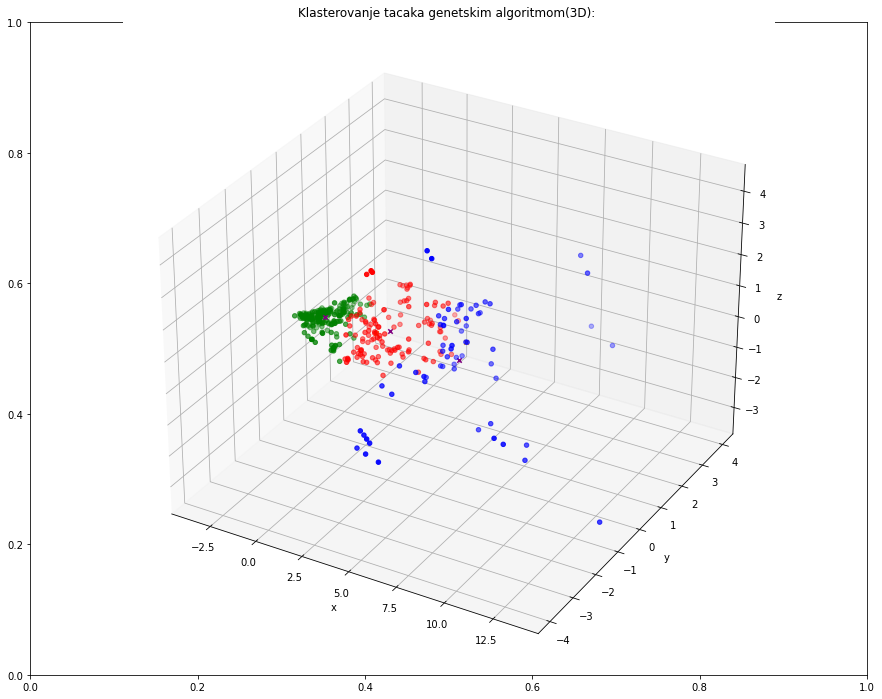

In [283]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax = fig.add_subplot(1, 3, 1, projection='3d')
for label in range(num_clusters):
    cluster = X_pca[X_pca['kmlabel'] == label]
    ax.scatter(cluster['pca_0'],cluster['pca_1'],cluster['pca_2'],c=colors[label])

#ax = fig.add_subplot(1, 3, 2, projection='3d')
for i in range(l-1,(l-num_clusters-1),-1):
    ax.scatter( (X_pca.iloc[i,0]),(X_pca.iloc[i,1]),(X_pca.iloc[i,2]),c='orange',marker='x',depthshade=False)

#ax = fig.add_subplot(1, 3, 3, projection='3d')
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

plt.show()

In [284]:
model.cluster_centers_

array([[ 1.18904456,  0.19165192, -0.03216962],
       [-2.09200842, -0.02822693, -0.00804032],
       [ 5.4884277 , -0.27149816,  0.09338785]])

In [285]:
for i in range(l-1,(l-num_clusters-1),-1):
    print(X_pca.iloc[i,0], X_pca.iloc[i,1], X_pca.iloc[i,2] )
    

5.299673782908824 0.19128718049685642 0.3237084798412947
1.0778574914842747 -0.2922435560101542 0.20283618780112433
-2.083585955721143 -0.16164347963577289 -0.0820516536978471


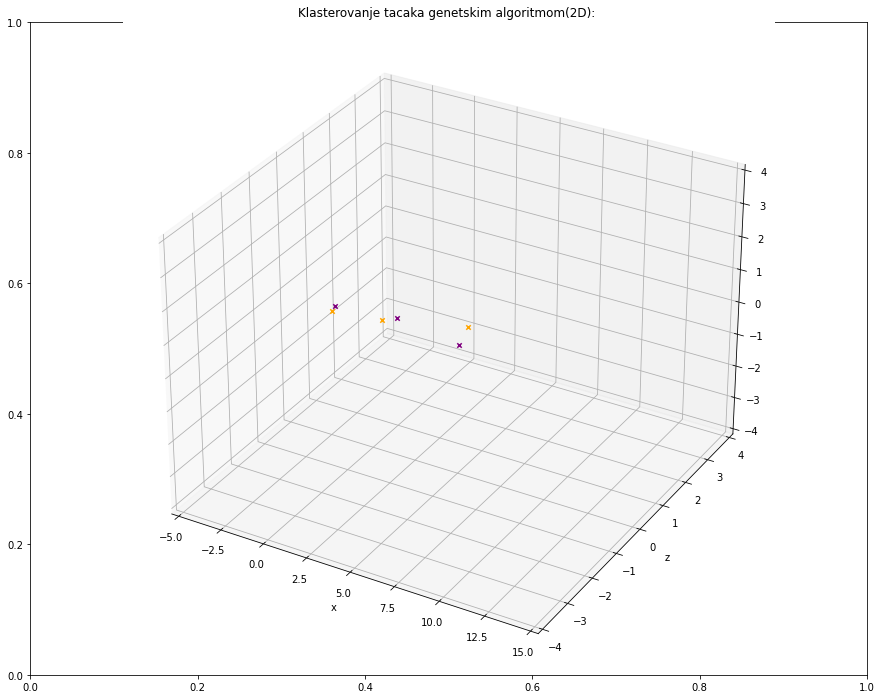

In [286]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylabel("z")
    
for i in range(l-1,(l-num_clusters-1),-1):
    ax.scatter( (X_pca.iloc[i,0]),(X_pca.iloc[i,1]),(X_pca.iloc[i,2]),c='orange',marker='x')
    
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

ax.set_xlim(-5.0 , 15.0)
ax.set_ylim(-4.0 , 4.0)
ax.set_zlim(-4.0 , 4.0)

plt.show()

In [287]:
print()

In [288]:
for i in range(l-1,(l-num_clusters-1),-1):
    print((X_pca.iloc[i,0]),(X_pca.iloc[i,1]),(X_pca.iloc[i,2]))
    
# centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
# ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

5.299673782908824 0.19128718049685642 0.3237084798412947
1.0778574914842747 -0.2922435560101542 0.20283618780112433
-2.083585955721143 -0.16164347963577289 -0.0820516536978471


In [289]:
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
print(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'])

0    1.189045
1   -2.092008
2    5.488428
Name: pca_0, dtype: float64 0    0.191652
1   -0.028227
2   -0.271498
Name: pca_1, dtype: float64 0   -0.032170
1   -0.008040
2    0.093388
Name: pca_2, dtype: float64


In [290]:
#nasi podaci:

In [291]:
X_pca['label'] = labels

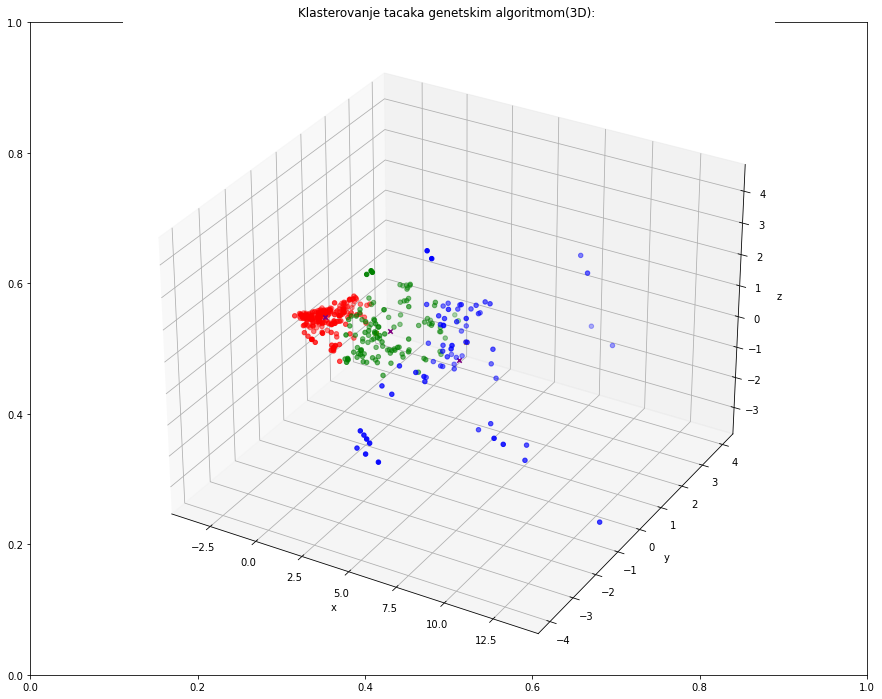

In [292]:
fig,ax=plt.subplots(figsize=(15,12))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax = fig.add_subplot(1, 3, 1, projection='3d')
for label in range(num_clusters):
    cluster = X_pca[X_pca['label'] == label]
    ax.scatter(cluster['pca_0'],cluster['pca_1'],cluster['pca_2'],c=colors[label])

#ax = fig.add_subplot(1, 3, 2, projection='3d')
for i in range(l-1,(l-num_clusters-1),-1):
    ax.scatter( (X_pca.iloc[i,0]),(X_pca.iloc[i,1]),(X_pca.iloc[i,2]),c='orange',marker='x',depthshade=False)

#ax = fig.add_subplot(1, 3, 3, projection='3d')
centroids = pd.DataFrame(model.cluster_centers_, columns=['pca_0','pca_1','pca_2'])
ax.scatter(centroids['pca_0'], centroids['pca_1'],centroids['pca_2'], c='purple',marker='x',depthshade=False)

plt.show()

# VISAK KODA:

In [293]:
##############################################

In [294]:
if num_dimensions==2:
    fig,ax=plt.subplots(figsize=(16,7))
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(2D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    colors=["red","green","black","yellow","blue"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            plt.scatter(((M[i])[j])[0],((M[i])[j])[1],c=colors[i])

    for j in range(num_clusters):
        plt.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        plt.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],c="purple",marker="x")
        
elif num_dimensions==3:
    fig=plt.figure(figsize=(16,7))
    ax=fig.add_subplot(111,projection='3d')
    ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    colors=["red","green","blue","yellow","black"]
    for i in range(num_clusters):
        for j in range(len(M[i])):
            ax.scatter(((M[i])[j])[0],((M[i])[j])[1],((M[i])[j])[2],c=colors[i])

    for j in range(num_clusters):
        ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")
        
    
    for j in range(num_clusters):
        ax.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],(k_means_centers[j])[2],c="purple",marker="x")

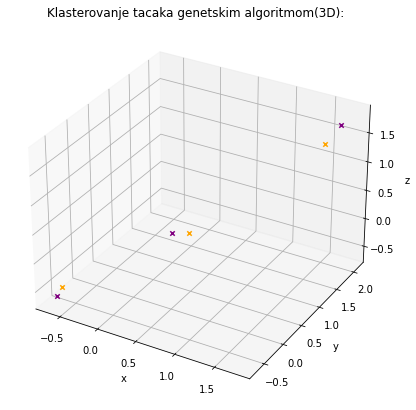

In [295]:
fig=plt.figure(figsize=(16,7))
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Klasterovanje tacaka genetskim algoritmom(3D): ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
colors=["red","green","blue","yellow","black"]

for j in range(num_clusters):
    ax.scatter((cluster_centers[j])[0],(cluster_centers[j])[1],(cluster_centers[j])[2],c="orange",marker="x")
        
    
for j in range(num_clusters):
    ax.scatter((k_means_centers[j])[0],(k_means_centers[j])[1],(k_means_centers[j])[2],c="purple",marker="x")